### Data Points

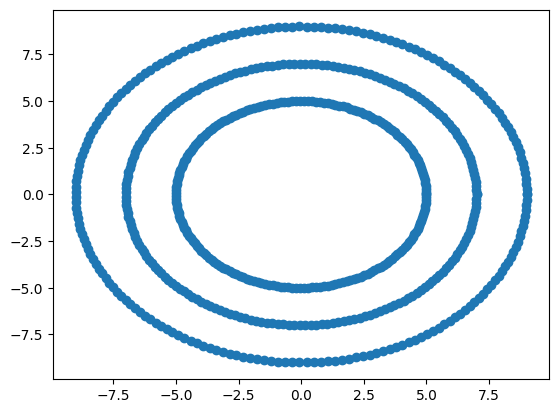

In [1]:
import numpy as np
import matplotlib.pyplot as plt

radius = np.array([5, 7, 9])
theta = np.linspace(0, 2*np.pi, 200)

x = np.outer(radius, np.cos(theta))
y = np.outer(radius, np.sin(theta))

circle_array = np.column_stack((x.flatten(), y.flatten()))

# Plot
plt.scatter(circle_array[:, 0], circle_array[:, 1])

### Spectral Clustering from Scratch

In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

def array_to_graph(array, epsilon):
    # Pseudo Adjacency Matrix using Pairwise Distance
    array = pairwise_distances(array, metric='euclidean')

    # Epsilon-Neighborhood Graph
    array[array > epsilon] = 0
    array[array != 0] = 1

    # Fill the diagonal with zero
    np.fill_diagonal(array, 0)

    return array

def graph_to_laplacian_matrix(graph):
    # Degree Matrix
    degree = np.sum(graph, axis=1)
    degree = np.diag(degree)

    # Laplacian Matrix
    laplacian = degree - graph

    return laplacian

In [3]:
def spectral_clustering(array, epsilon, n_clusters, k=2):

    graph = array_to_graph(array, epsilon)
    graph = graph_to_laplacian_matrix(graph)
    
    eigenvalues, eigenvectors = np.linalg.eigh(graph)
    spectral_embedding = eigenvectors[:, :k]

    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=69).fit(spectral_embedding)

    return kmeans.labels_

### Different values of k (Dim of Spectral Embeddings)

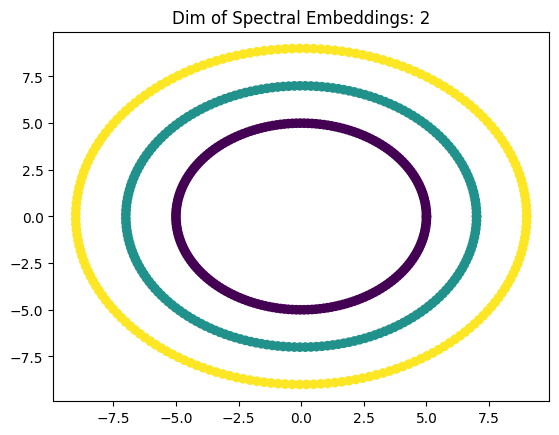

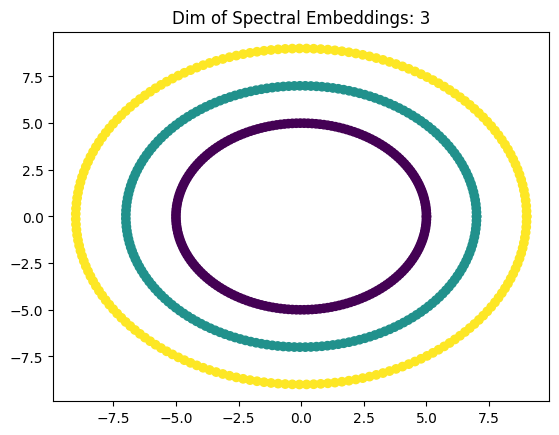

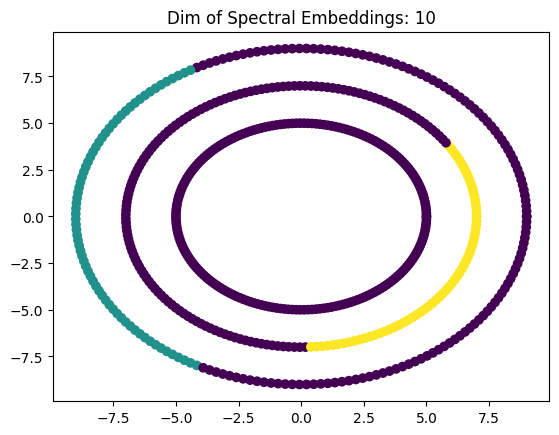

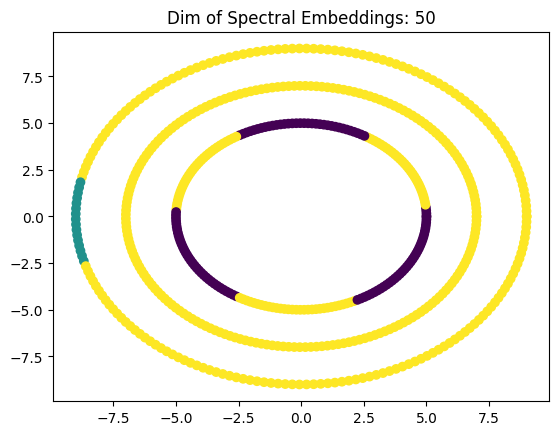

In [4]:
for k in [2, 3, 10, 50]:

    labels = spectral_clustering(circle_array, 
                                 epsilon=0.4,
                                 n_clusters=3,
                                 k=k)

    plt.scatter(circle_array[:, 0], circle_array[:, 1], c=labels, cmap='viridis')
    plt.title(f'Dim of Spectral Embeddings: {k}')
    plt.show()

### Moon Fig

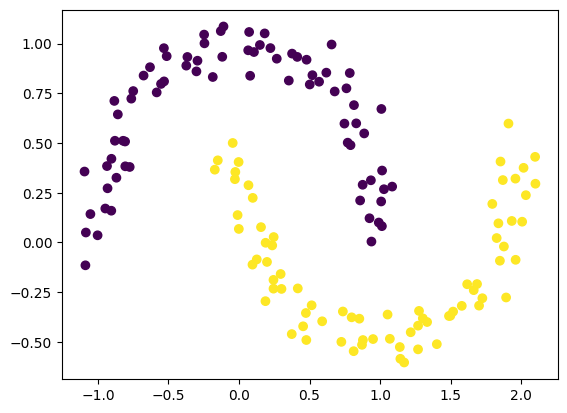

In [5]:
from sklearn.datasets import make_moons 

X, Y = make_moons(150, noise=.07, random_state=69)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')

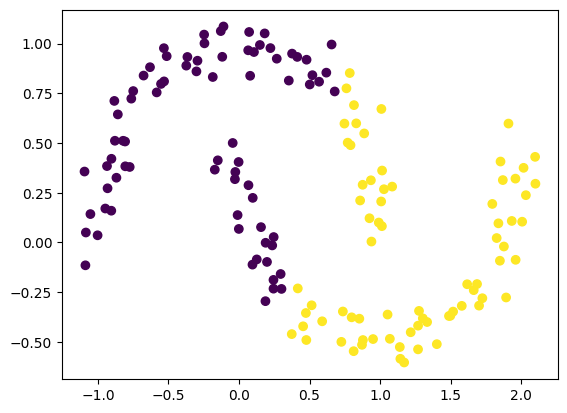

In [6]:
# KMeans

kmeans = KMeans(n_clusters=2, random_state=69).fit(X)
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

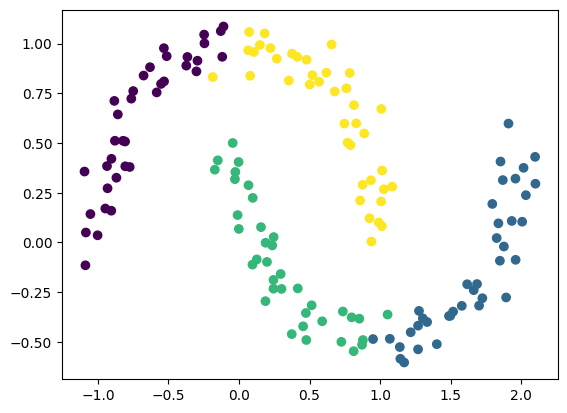

In [7]:
# Spectral Clustering

labels = spectral_clustering(X,
                             epsilon=0.4,
                             n_clusters=4,
                             k=2)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')